In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Importing the csv file
data = pd.read_csv('data.csv')

In [ ]:
data.shape

(1200, 28)

In [ ]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Analysis of Department wise Perfomance

In [ ]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [ ]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

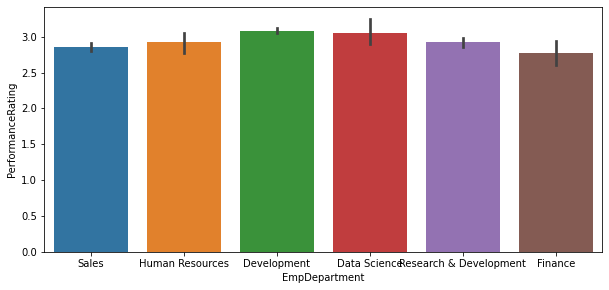

In [ ]:
plt.figure(figsize=(10,4.5))
sns.barplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

In [ ]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [ ]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

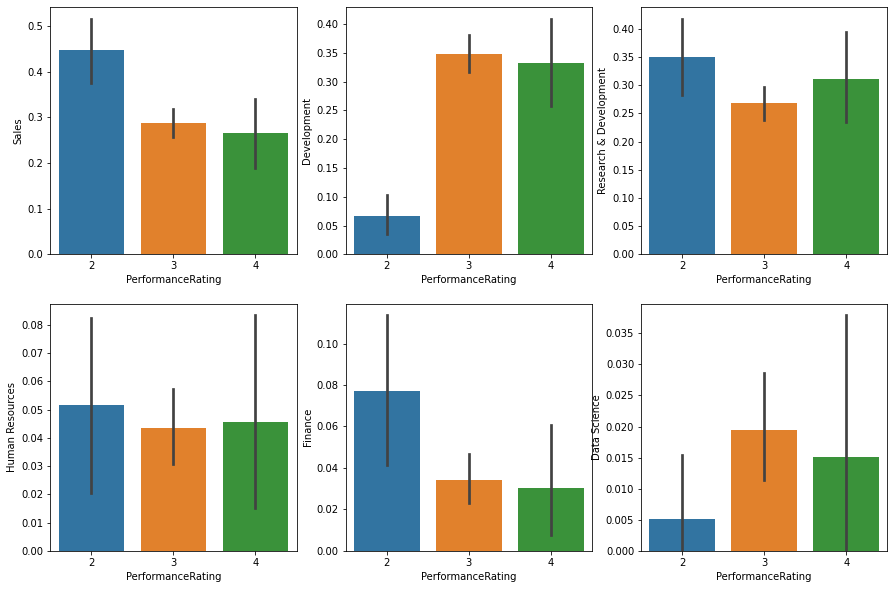

In [ ]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()